In [6]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import scipy.linalg as la
%matplotlib inline

In [7]:
#Upload the dataset
data = pd.read_excel('dataColombia.xlsx')

#Visualization
data

,year,GDP (Billions),military,health,education,science
0,2004,117082,3465,5799,4079,0.154
1,2005,145619,3353,6067,4021,0.151
2,2006,161619,3276,6336,3917,0.150
3,2007,206182,3267,6491,4083,0.185
4,2008,242187,3745,6842,3939,0.201
5,2009,232398,3885,7311,4777,0.196
6,2010,286563,3643,7071,4834,0.195
7,2011,334944,3082,6781,4466,0.206
8,2012,370921,3159,6746,4370,0.234
9,2013,382116,3274,7017,4879,0.271


In [8]:
#Adjustment
data['military']=data['military']/1000
data['health']=data['health']/1000
data['education']=data['education']/1000
data['GDP (Billions)'] = data['GDP (Billions)']/1000

In [9]:
data

,year,GDP (Billions),military,health,education,science
0,2004,117.082,3.465,5.799,4.079,0.154
1,2005,145.619,3.353,6.067,4.021,0.151
2,2006,161.619,3.276,6.336,3.917,0.150
3,2007,206.182,3.267,6.491,4.083,0.185
4,2008,242.187,3.745,6.842,3.939,0.201
5,2009,232.398,3.885,7.311,4.777,0.196
6,2010,286.563,3.643,7.071,4.834,0.195
7,2011,334.944,3.082,6.781,4.466,0.206
8,2012,370.921,3.159,6.746,4.370,0.234
9,2013,382.116,3.274,7.017,4.879,0.271


In [10]:
#Column selection
datawork = data.loc[:,['military','health','education','science']]
datawork

,military,health,education,science
0,3.465,5.799,4.079,0.154
1,3.353,6.067,4.021,0.151
2,3.276,6.336,3.917,0.150
3,3.267,6.491,4.083,0.185
4,3.745,6.842,3.939,0.201
5,3.885,7.311,4.777,0.196
6,3.643,7.071,4.834,0.195
7,3.082,6.781,4.466,0.206
8,3.159,6.746,4.370,0.234
9,3.274,7.017,4.879,0.271


In [11]:
X = np.vstack((datawork['military'],datawork['health'],datawork['education'],datawork['science'])).T

In [12]:
datawork.columns

Index(['military', 'health', 'education', 'science'], dtype='object')

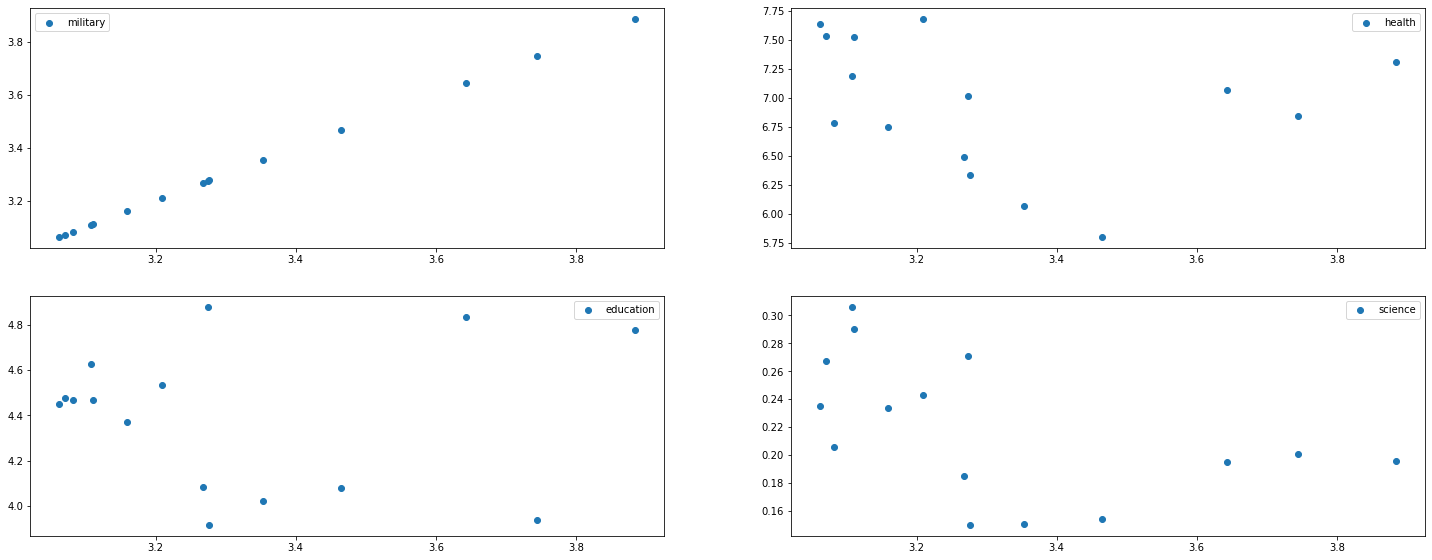

In [13]:
plt.figure(figsize=(25,15))
for i,j in enumerate(datawork.columns[:]):
    plt.subplot(3,2,i+1)
    plt.scatter(datawork["military"],data[j],label=j)
    plt.legend()
plt.show()

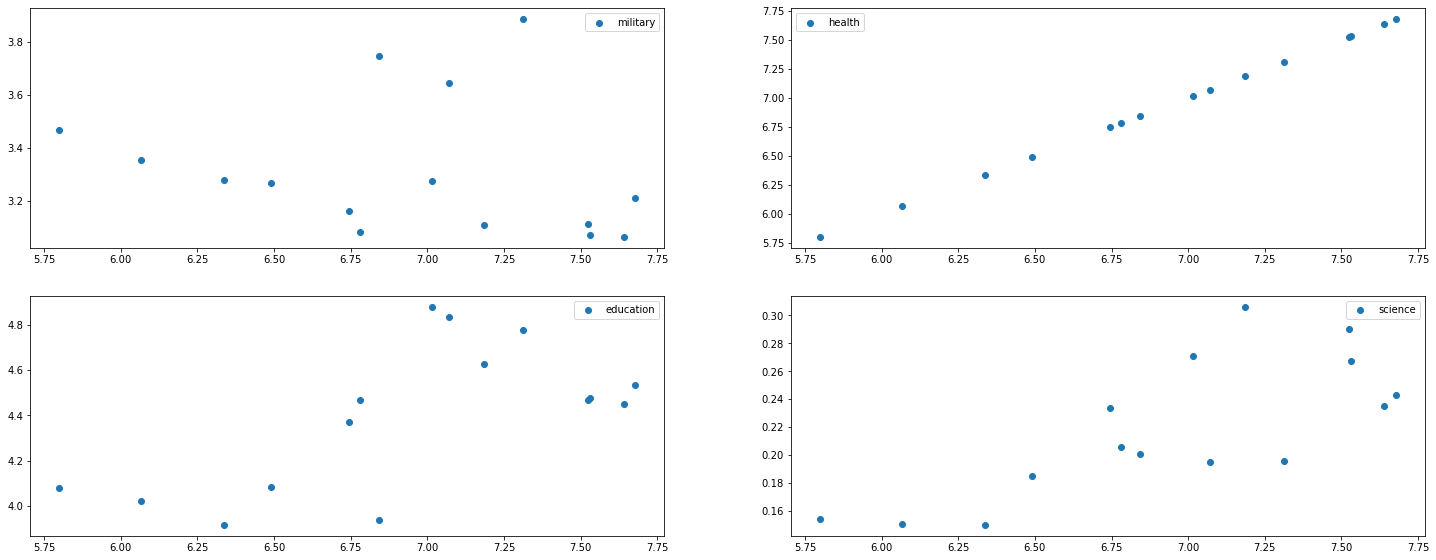

In [14]:
plt.figure(figsize=(25,15))
for i,j in enumerate(datawork.columns[:]):
    plt.subplot(3,2,i+1)
    plt.scatter(datawork["health"],data[j],label=j)
    plt.legend()
plt.show()

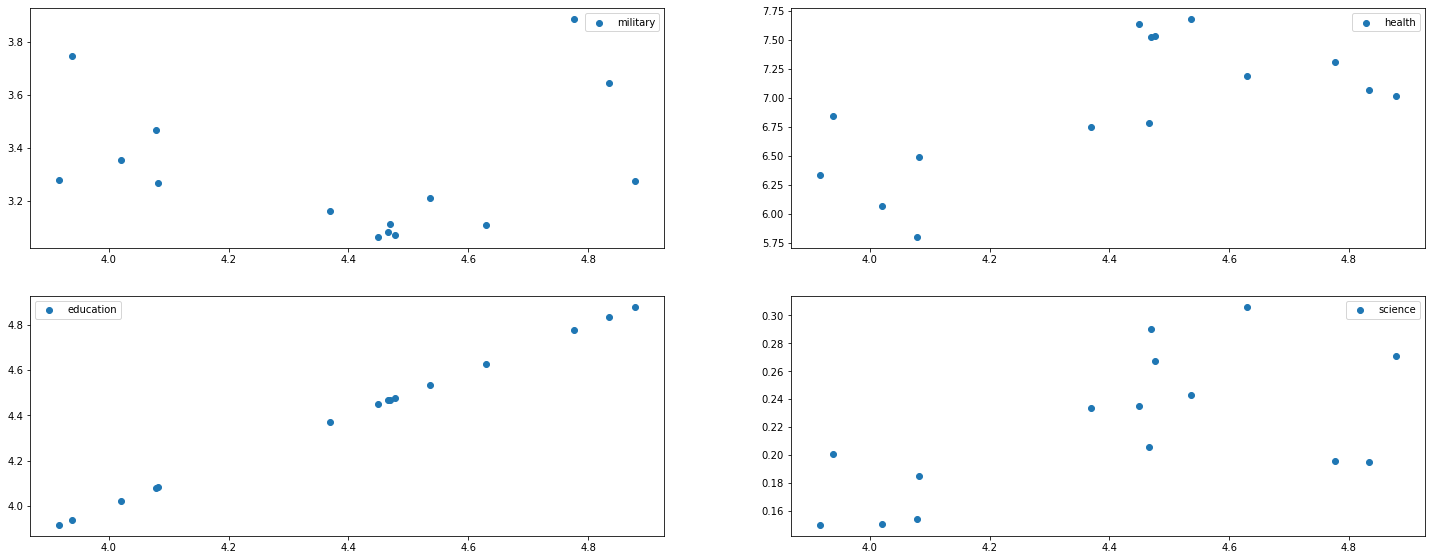

In [15]:
plt.figure(figsize=(25,15))
for i,j in enumerate(datawork.columns[:]):
    plt.subplot(3,2,i+1)
    plt.scatter(datawork["education"],data[j],label=j)
    plt.legend()
plt.show()

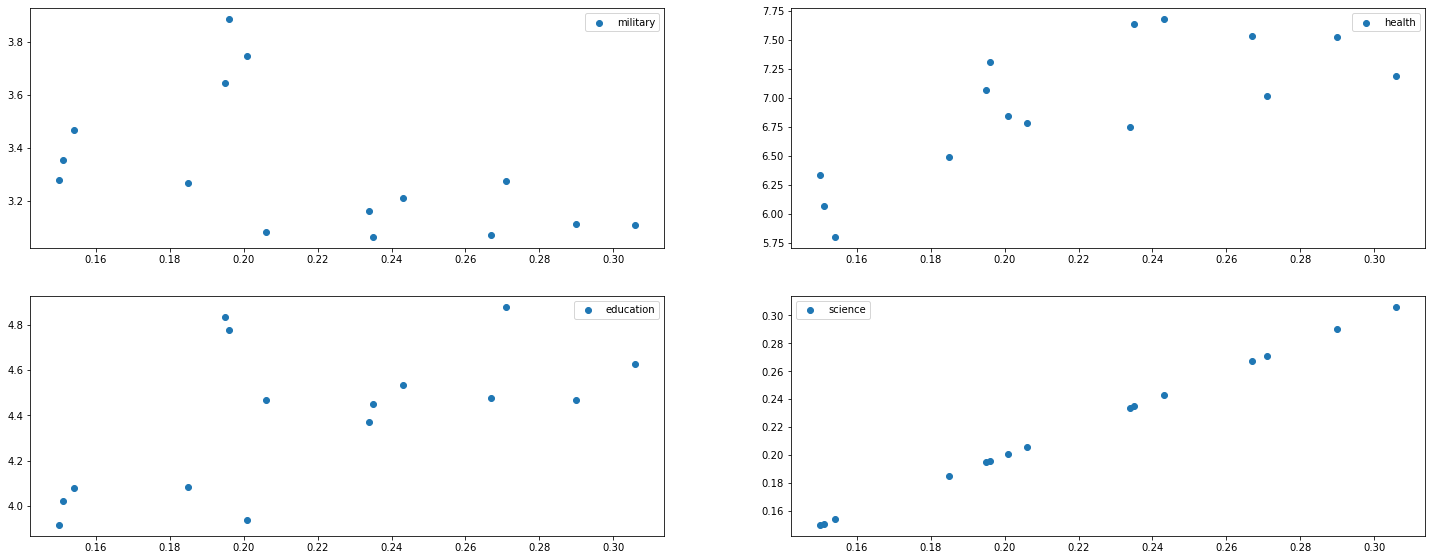

In [16]:
plt.figure(figsize=(25,15))
for i,j in enumerate(datawork.columns[:]):
    plt.subplot(3,2,i+1)
    plt.scatter(datawork["science"],data[j],label=j)
    plt.legend()
plt.show()

In [17]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x))

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1]), cov(X[0], X[2]), cov(X[0], X[3])], \
                     [cov(X[1], X[0]), cov(X[1], X[1]), cov(X[1], X[2]), cov(X[1], X[3])], \
                     [cov(X[2], X[0]), cov(X[2], X[1]), cov(X[2], X[2]), cov(X[2], X[3])], \
                     [cov(X[3], X[0]), cov(X[3], X[1]), cov(X[3], X[2]), cov(X[3], X[3])]])

# Calculate covariance matrix 
covM = cov_mat(X.T) # (or with np.cov(X.T))

In [18]:
covM

array([[ 0.06300646, -0.03019496, -0.0004838 , -0.00593634],
       [-0.03019496,  0.30993729,  0.11215742,  0.02025418],
       [-0.0004838 ,  0.11215742,  0.096131  ,  0.009079  ],
       [-0.00593634,  0.02025418,  0.009079  ,  0.00233593]])

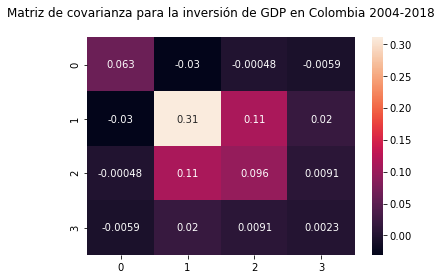

In [48]:
sn.heatmap(covM, annot=True)
plt.title('Matriz de covarianza para la inversión de GDP en Colombia 2004-2018\n')
plt.show()

In [20]:
correM = datawork.corr()

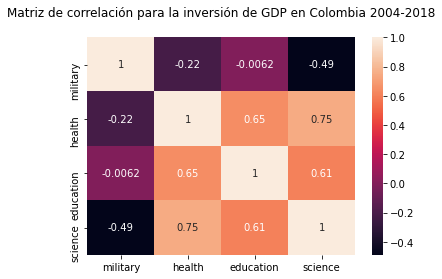

In [49]:
sn.heatmap(correM, annot=True)
plt.title('Matriz de correlación para la inversión de GDP en Colombia 2004-2018\n')
plt.show()

In [23]:
evals, evecs = la.eig(covM)
print(evals,evecs)

[0.36203238+0.j 0.06732184+0.j 0.04142222+0.j 0.00063424+0.j] [[ 0.09423262 -0.85566673 -0.50341398  0.07435736]
 [-0.91462671  0.12127964 -0.38345684 -0.04135317]
 [-0.38810782 -0.50101163  0.77218701 -0.0456825 ]
 [-0.06285311  0.0459678   0.05711777  0.99532608]]


In [18]:
evecs = np.asarray(evecs, None, None) 
evecs

array([[ 0.09423262, -0.85566673, -0.50341398,  0.07435736],
       [-0.91462671,  0.12127964, -0.38345684, -0.04135317],
       [-0.38810782, -0.50101163,  0.77218701, -0.0456825 ],
       [-0.06285311,  0.0459678 ,  0.05711777,  0.99532608]])

In [59]:
mdiagonal = np.diag(evals)
mdiagonal

array([[0.36203238+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.06732184+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.04142222+0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.        +0.j, 0.00063424+0.j]])

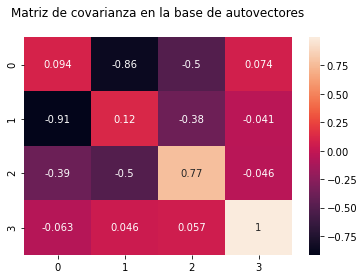

In [60]:
sn.heatmap(evecs, annot=True)
plt.title('Matriz de covarianza en la base de autovectores\n')
plt.show()

In [62]:
inverse = np.linalg.inv(evecs)

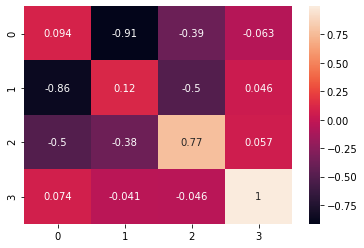

In [63]:
sn.heatmap(inverse, annot=True)
plt.show()

In [21]:
evecs

array([[ 0.09423262, -0.85566673, -0.50341398,  0.07435736],
       [-0.91462671,  0.12127964, -0.38345684, -0.04135317],
       [-0.38810782, -0.50101163,  0.77218701, -0.0456825 ],
       [-0.06285311,  0.0459678 ,  0.05711777,  0.99532608]])

In [22]:
a = np.dot(inverse,covM)

In [23]:
D = np.dot(a,evecs)

In [24]:
D

array([[ 3.62032379e-01,  2.77555756e-17, -2.77555756e-17,
        -2.25514052e-17],
       [ 1.56125113e-17,  6.73218415e-02,  3.46944695e-18,
        -9.10729825e-18],
       [-1.38777878e-17,  3.46944695e-17,  4.14222164e-02,
         1.47451495e-17],
       [ 3.49621319e-17, -3.56431464e-18,  1.16551734e-18,
         6.34238782e-04]])

In [25]:
#Transformation Matrix

In [32]:
u1 = np.linalg.solve(covM,evecs[:,0])
u2 = np.linalg.solve(covM,evecs[:,1])
u3 = np.linalg.solve(covM,evecs[:,2])
u4 = np.linalg.solve(covM,evecs[:,3])
u1,u2,u3,u4

(array([ 0.26028782, -2.52636715, -1.07202517, -0.17361185]),
 array([-12.71009105,   1.80149021,  -7.44203688,   0.68280661]),
 array([-12.15323625,  -9.25727476,  18.64185637,   1.37891642]),
 array([ 117.23873998,  -65.20126868,  -72.02729323, 1569.3239046 ]))

In [33]:
evecs[:,0]

array([ 0.09423262, -0.91462671, -0.38810782, -0.06285311])

In [34]:
tupla = [u1,u2,u3,u4] 
tupla

[array([ 0.26028782, -2.52636715, -1.07202517, -0.17361185]),
 array([-12.71009105,   1.80149021,  -7.44203688,   0.68280661]),
 array([-12.15323625,  -9.25727476,  18.64185637,   1.37891642]),
 array([ 117.23873998,  -65.20126868,  -72.02729323, 1569.3239046 ])]

In [35]:
matrizt = np.asarray(tupla) 

In [36]:
matrizt

array([[ 2.60287818e-01, -2.52636715e+00, -1.07202517e+00,
        -1.73611853e-01],
       [-1.27100910e+01,  1.80149021e+00, -7.44203688e+00,
         6.82806609e-01],
       [-1.21532363e+01, -9.25727476e+00,  1.86418564e+01,
         1.37891642e+00],
       [ 1.17238740e+02, -6.52012687e+01, -7.20272932e+01,
         1.56932390e+03]])

<AxesSubplot:>

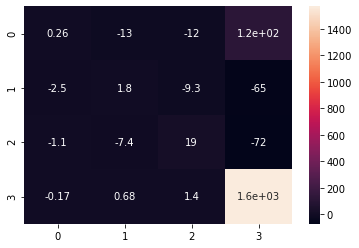

In [41]:
sn.heatmap(matrizt.T, annot=True)

In [46]:
np.dot(covM,matrizt.T)

array([[ 0.09423262, -0.85566673, -0.50341398,  0.07435736],
       [-0.91462671,  0.12127964, -0.38345684, -0.04135317],
       [-0.38810782, -0.50101163,  0.77218701, -0.0456825 ],
       [-0.06285311,  0.0459678 ,  0.05711777,  0.99532608]])

In [31]:
evecs

array([[ 0.09423262, -0.85566673, -0.50341398,  0.07435736],
       [-0.91462671,  0.12127964, -0.38345684, -0.04135317],
       [-0.38810782, -0.50101163,  0.77218701, -0.0456825 ],
       [-0.06285311,  0.0459678 ,  0.05711777,  0.99532608]])